<a href="https://colab.research.google.com/github/amoghghadge/DS4002-Project3/blob/main/project_3_eda_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

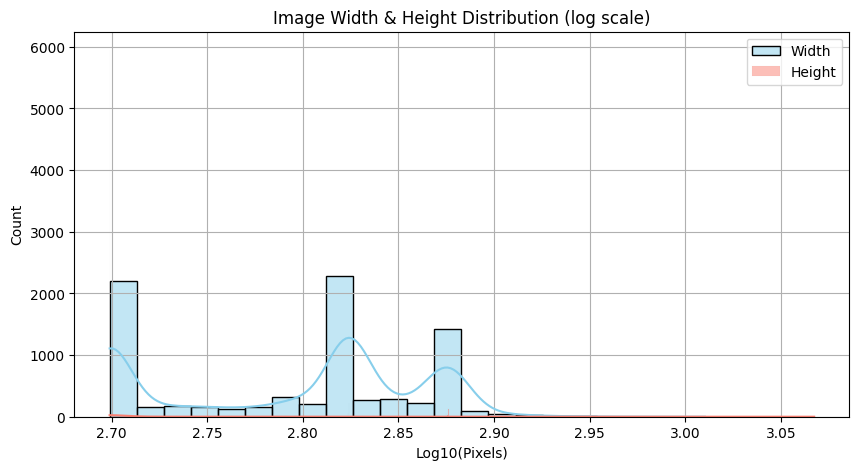

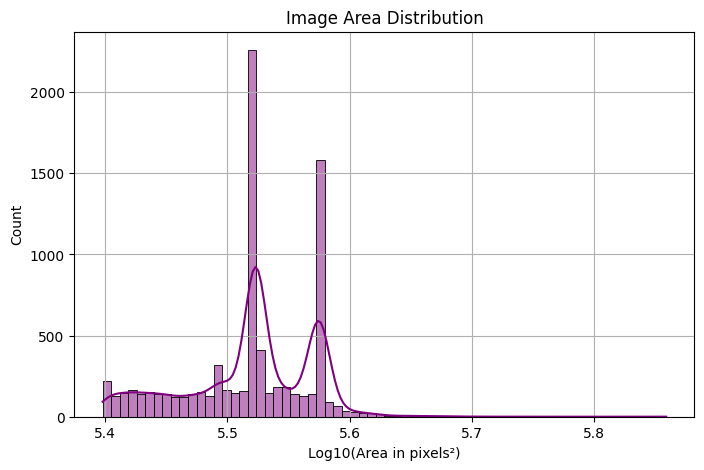

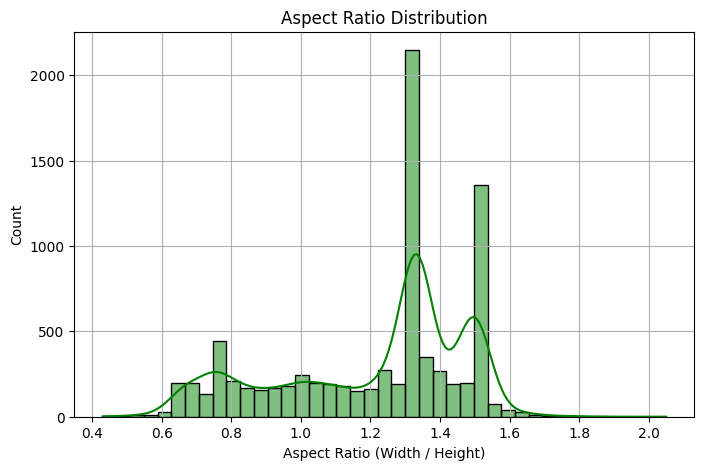

<ipython-input-4-d0d9d8b24d88>:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="label", data=df, palette="viridis")


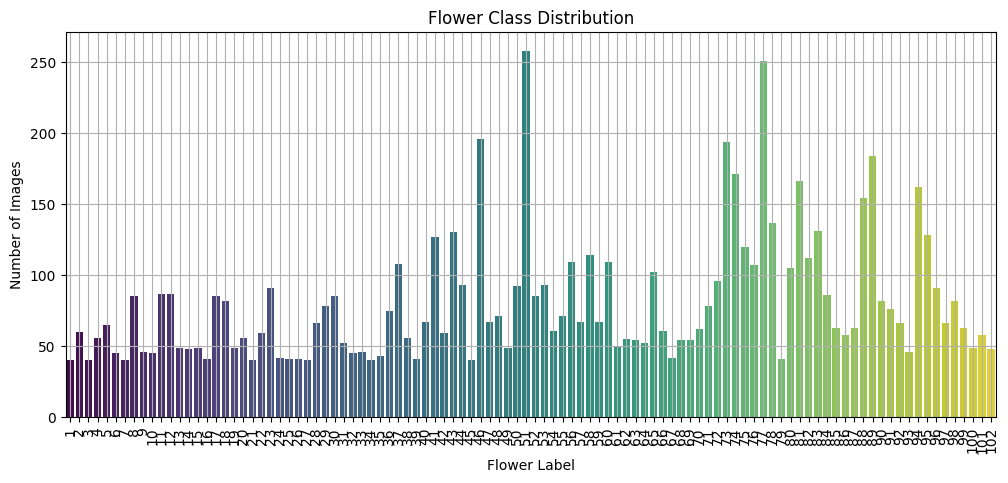

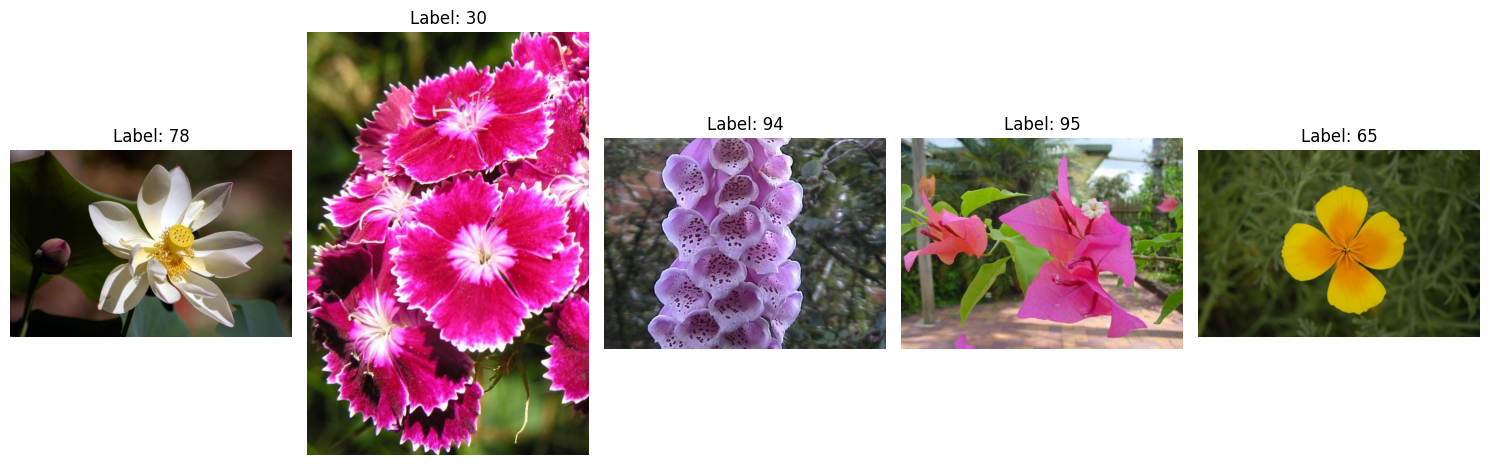

In [ ]:
##basic EDA and visualizations

import os
import tarfile
from PIL import Image, UnidentifiedImageError
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import tempfile
import shutil

#1 extract TGZ file
tgz_path = "/content/102flowers.tgz"
temp_dir = tempfile.mkdtemp()

with tarfile.open(tgz_path, "r:gz") as tar:
    tar.extractall(path=temp_dir)

#2 locate the image folder
jpg_folder = os.path.join(temp_dir, "jpg")

#3 load label numbers
labels_csv_path = "/content/flowerimagelabels.csv"
labels_df = pd.read_csv(labels_csv_path)

#4 collect image info
image_data = []
image_files = sorted(os.listdir(jpg_folder))

for i, file in enumerate(image_files):
    file_path = os.path.join(jpg_folder, file)
    try:
        with Image.open(file_path) as img:
            image_data.append({
                "file": file,
                "width": img.width,
                "height": img.height,
                "area": img.width * img.height,
                "aspect_ratio": round(img.width / img.height, 2),
                "label": labels_df["label"].iloc[i]
            })
    except (UnidentifiedImageError, OSError):
        pass

df = pd.DataFrame(image_data)

#5 visualizations

#image width & height plot
plt.figure(figsize=(10, 5))
sns.histplot(np.log10(df["width"]), color="skyblue", label="Width", kde=True)
sns.histplot(np.log10(df["height"]), color="salmon", label="Height", kde=True)
plt.xlabel("Log10(Pixels)")
plt.ylabel("Count")
plt.title("Image Width & Height Distribution (log scale)")
plt.legend()
plt.grid(True)
plt.show()

#image area plot
plt.figure(figsize=(8, 5))
sns.histplot(np.log10(df["area"]), color="purple", kde=True)
plt.xlabel("Log10(Area in pixels²)")
plt.title("Image Area Distribution")
plt.grid(True)
plt.show()

#aspect Ratio
plt.figure(figsize=(8, 5))
sns.histplot(df["aspect_ratio"], color="green", kde=True)
plt.xlabel("Aspect Ratio (Width / Height)")
plt.title("Aspect Ratio Distribution")
plt.grid(True)
plt.show()

#flower class label Distribution
plt.figure(figsize=(12, 5))
sns.countplot(x="label", data=df, palette="viridis")
plt.title("Flower Class Distribution")
plt.xlabel("Flower Label")
plt.ylabel("Number of Images")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

#5 random sample images
def show_samples(df, folder, n=5):
    samples = df.sample(n)
    plt.figure(figsize=(15, 5))
    for i, row in enumerate(samples.itertuples()):
        img = Image.open(os.path.join(folder, row.file))
        plt.subplot(1, n, i + 1)
        plt.imshow(img)
        plt.title(f"Label: {row.label}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

show_samples(df, jpg_folder)


In [ ]:
#print labels with the higest counts (to see which flowers are occur most frequently)
top_classes = df["label"].value_counts().head(5)
print(top_classes)

label
51    258
77    251
46    196
73    194
89    184
Name: count, dtype: int64


In [ ]:
##map flower labels to the actual flower names for easier analysis

#create dictionary mapping labels to flower names
label_to_name = {
    1: "pink primrose",
    2: "hard-leaved pocket orchid",
    3: "canterbury bells",
    4: "sweet pea",
    5: "english marigold",
    6: "tiger lily",
    7: "moon orchid",
    8: "bird of paradise",
    9: "monkshood",
    10: "globe thistle",
    11: "snapdragon",
    12: "colt's foot",
    13: "king protea",
    14: "spear thistle",
    15: "yellow iris",
    16: "globe-flower",
    17: "purple coneflower",
    18: "peruvian lily",
    19: "balloon flower",
    20: "giant white arum lily",
    21: "fire lily",
    22: "pincushion flower",
    23: "fritillary",
    24: "red ginger",
    25: "grape hyacinth",
    26: "corn poppy",
    27: "prince of wales feathers",
    28: "stemless gentian",
    29: "artichoke",
    30: "sweet william",
    31: "carnation",
    32: "garden phlox",
    33: "love in the mist",
    34: "mexican aster",
    35: "alpine sea holly",
    36: "ruby-lipped cattleya",
    37: "cape flower",
    38: "great masterwort",
    39: "siam tulip",
    40: "lenten rose",
    41: "barbeton daisy",
    42: "daffodil",
    43: "sword lily",
    44: "poinsettia",
    45: "bolero deep blue",
    46: "wallflower",
    47: "marigold",
    48: "buttercup",
    49: "oxeye daisy",
    50: "common dandelion",
    51: "petunia",
    52: "wild pansy",
    53: "primula",
    54: "sunflower",
    55: "pelargonium",
    56: "bishop of llandaff",
    57: "gaura",
    58: "geranium",
    59: "orange dahlia",
    60: "pink-yellow dahlia?",
    61: "cautleya spicata",
    62: "japanese anemone",
    63: "black-eyed susan",
    64: "silverbush",
    65: "californian poppy",
    66: "osteospermum",
    67: "spring crocus",
    68: "bearded iris",
    69: "windflower",
    70: "tree poppy",
    71: "gazania",
    72: "azalea",
    73: "water lily",
    74: "rose",
    75: "thorn apple",
    76: "morning glory",
    77: "passion flower",
    78: "lotus",
    79: "toad lily",
    80: "anthurium",
    81: "frangipani",
    82: "clematis",
    83: "hibiscus",
    84: "columbine",
    85: "desert-rose",
    86: "tree mallow",
    87: "magnolia",
    88: "cyclamen",
    89: "watercress",
    90: "canna lily",
    91: "hippeastrum",
    92: "bee balm",
    93: "ball moss",
    94: "foxglove",
    95: "bougainvillea",
    96: "camellia",
    97: "mallow",
    98: "mexican petunia",
    99: "bromelia",
    100: "blanket flower",
    101: "trumpet creeper",
    102: "blackberry lily"
}

#map labels to names in your DataFrame
df["flower_name"] = df["label"].map(label_to_name)

label_df = pd.DataFrame(list(label_to_name.items()), columns=["Label", "Flower Name"])

#save to CSV
label_df.to_csv("/content/label_to_name.csv", index=False)


Displaying images for label '56' with count 109:


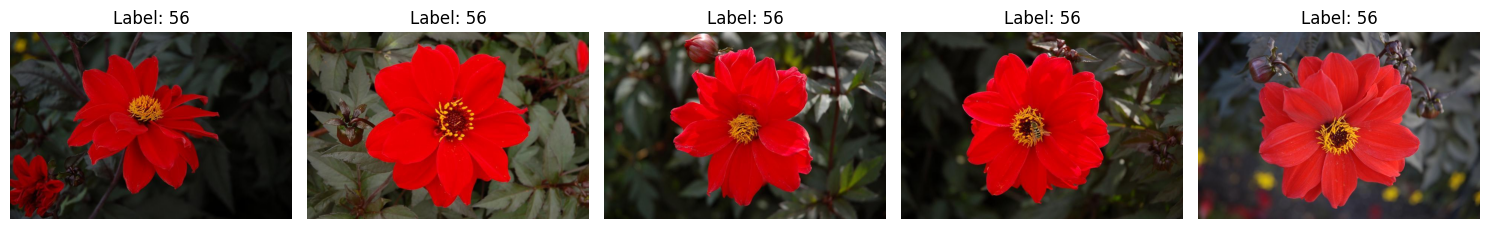


Displaying images for label '60' with count 109:


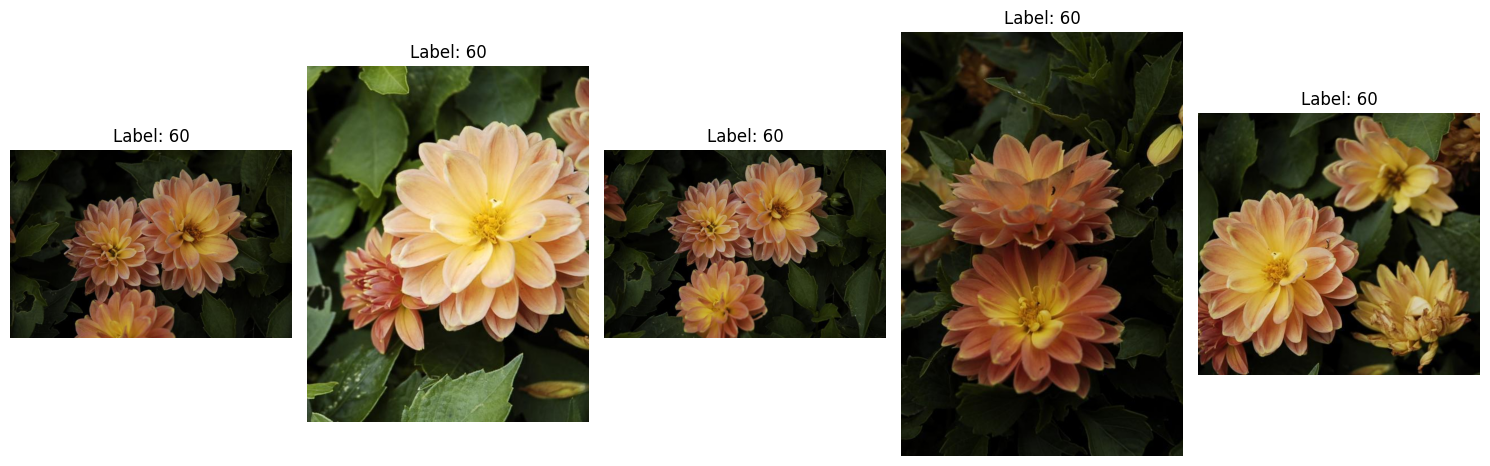


Displaying images for label '44' with count 93:


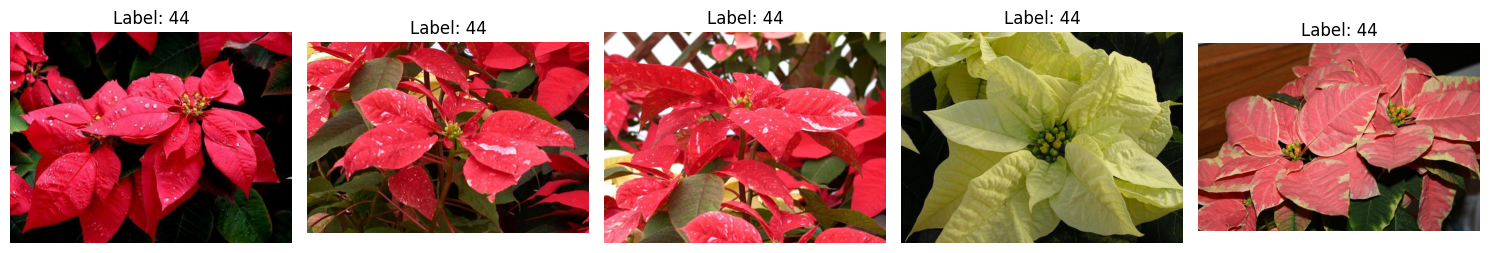


Displaying images for label '53' with count 93:


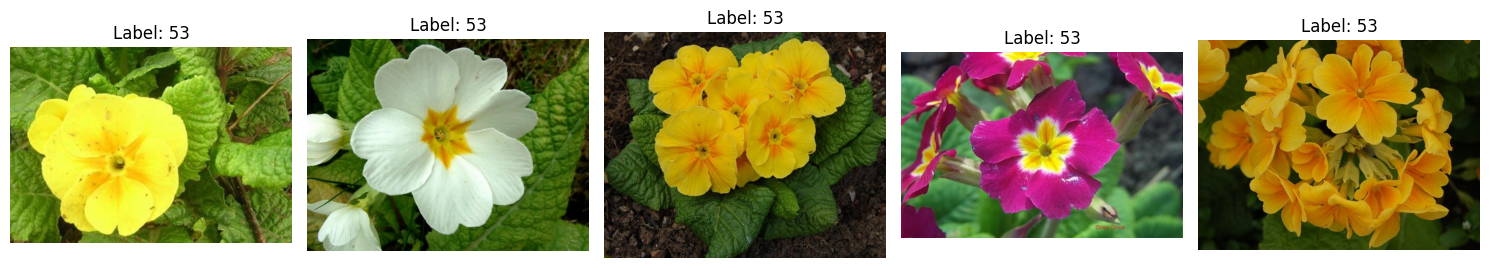


Displaying images for label '96' with count 91:


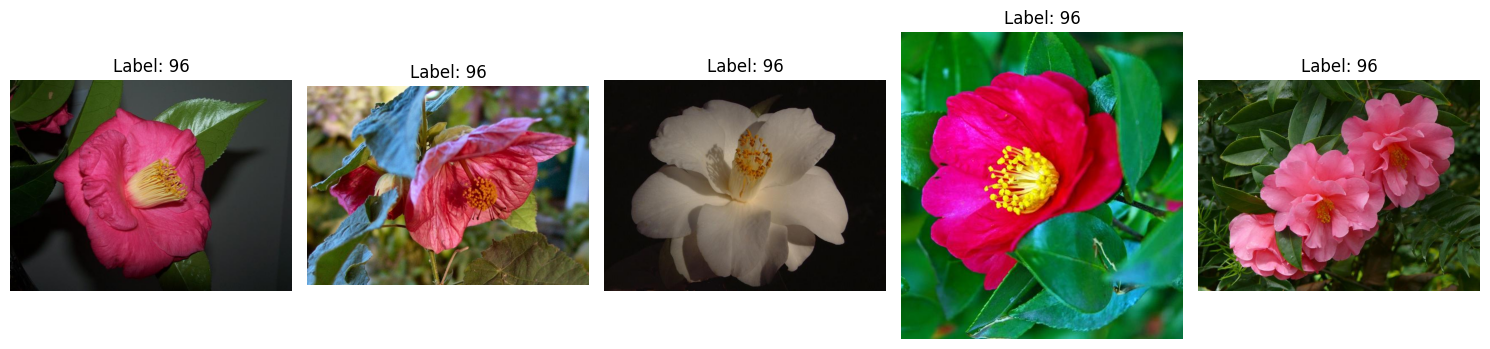

In [17]:
##view labels with same # of images to ensure accurate label to name mapping

#count how many images each label has
label_counts = df["label"].value_counts()

#group the labels that have the same count
same_count_labels = label_counts[label_counts.duplicated(keep=False)]

#show images labels that share the same count
def show_grouped_images(df, same_count_labels, folder, n_images_per_label=5, max_labels=5):
    """
    Displays up to `n_images_per_label` random images for up to `max_labels` labels
    that share the same number of images.
    """
    displayed_labels = 0

    for label, count in same_count_labels.items():
        if displayed_labels >= max_labels:
            break

        print(f"\nDisplaying images for label '{label}' with count {count}:")

        sample_df = df[df["label"] == label]
        sample_df = sample_df.sample(min(n_images_per_label, len(sample_df)))
        plt.figure(figsize=(15, 5))
        for i, row in enumerate(sample_df.itertuples()):
            img = Image.open(os.path.join(folder, row.file))
            plt.subplot(1, len(sample_df), i + 1)
            plt.imshow(img)
            plt.title(f"Label: {row.label}")
            plt.axis("off")

        plt.tight_layout()
        plt.show()

        displayed_labels += 1

show_grouped_images(df, same_count_labels, jpg_folder)

### (only 5 examples are displayed because the file would be too big otherwise)